## __Language Similarity Predictor__
### __Abstract:__
* Made by: __Payton Lin__ (pal109@pitt.edu)
* __Research Question:__ *How difficult is it to learn a language based on previous language experience?*
  * As a linguistics minor interested in language acquisition I would like to know how similar languages are to each other and if they could be learned simultaneously.
* __Why?__
  * Lanuage learning is difficult and there is a lot of variance in the previous knowledge a language learner may have. 
  * Predicting this could help language learners and researchers save time and make decisions based on the estimate.
* __For who?__
  * Linguistic researchers and language learners
### __Methods:__
* Linear Regression
* R^2
### __Data:__
* Gathered from https://asjp.clld.org/languages
  * Wichmann, Søren, Eric W. Holman, and Cecil H. Brown (eds.). 2022. The ASJP Database (version 20).
* Converted from JSON files into CSV files through online converter (https://www.convertcsv.com/json-to-csv.htm)
### __ASJP Codebook:__
    |  ASJP |                             Phonetic Description                               |         IPA         |
    |-------|--------------------------------------------------------------------------------|---------------------|
    |   i   |                   high front vowel, rounded and unrounded                      |    (i, ɪ, y, ʏ)     |
    |   e   |                   mid front vowel, rounded and unrounded                       |       (e, ø)        |
    |   E   |                   low front vowel, rounded and unrounded                       | (a, æ, ɛ, ɶ, œ, e)  |
    |   3   |                high and mid central vowel, rounded and unrounded               |(ɨ, ɘ, ə, ɜ, ʉ, ɵ, ɞ)|
    |   a   |                       low central vowel, unrounded                             |        (ɐ, ä)       |
    |   u   |                   high back vowel, rounded and unrounded                       |      (ɯ, u, ʊ)      |
    |   o   |               mid and low back vowel, rounded and unrounded                    |  (ɤ, ʌ, ɑ, o, ɔ, ɒ) |
    |   p   |                   voiceless bilabial stop and fricative                        |         (p, ɸ)      |
    |   b   |                      voiced bilabial stop and fricative                        |         (b, β)      |
    |   m   |                                bilabial nasal                                  |           (m)       |
    |   f   |                       voiceless labiodental fricative                          |           (f)       |
    |   v   |                       voiced labiodental fricative                             |           (v)       |
    |   8   |                     voiceless and voiced dental fricative                      |          (θ, ð)     |
    |   4   |                                 dental nasal                                   |           (n̪)       |
    |   t   |                           voiceless alveolar stop                              |           (t)       |
    |   d   |                           voiced alveolar stop                                 |           (d)       |
    |   s   |                       voiceless alveolar fricative                             |           (s)       |
    |   z   |                          voiced alveolar fricative                             |           (z)       |
    |   c   |                     voiceless and voiced alveolar affricate                    |         (t͡s, d͡z)    |
    |   n   |                       voiceless and voiced alveolar nasal                      |           (n)       |
    |   S   |                       voiceless postalveolar fricative                         |           (ʃ)       |
    |   Z   |                          voiced postalveolar fricative                         |           (ʒ)       |
    |   C   |                       voiceless palato-alveolar affricate                      |           (t͡ʃ)      |
    |   j   |                           voiced palato-alveolar affricate                     |           (d͡ʒ)      |
    |   T   |                       voiceless and voiced palatal stop                        |          (c, ɟ)     |
    |   5   |                                 palatal nasal                                  |           (ɲ)       |
    |   k   |                               voiceless velar stop                             |           (k)       |
    |   g   |                               voiced velar stop                                |           (ɡ)       |
    |   x   |                       voiceless and voiced velar fricative                     |          (x, ɣ)     |
    |   N   |                                   velar nasal                                  |           (ŋ)       |
    |   q   |                               voiceless uvular stop                            |           (q)       |
    |   G   |                               voiced uvular stop                               |           (ɢ)       |
    |   X   |voiceless and voiced uvular fricative, voiceless and voiced pharyngeal fricative|      (χ, ʁ, ħ, ʕ)   |
    |   7   |                             voiceless glottal stop                             |           (ʔ)       |
    |   h   |                      voiceless and voiced glottal fricative                    |          (h, ɦ)     |
    |   l   |                         voiced alveolar lateral approximate                    |           (l)       |
    |   L   |                               all other laterals                               |        (ʟ, ɭ, ʎ)    |
    |   w   |                       voiced bilabial-velar approximant                        |           (w)       |
    |   y   |                               palatal approximant                              |           (j)       |
    |   r   |          voiced apico-alveolar trill and all varieties of “r-sounds”           |       (r, ʀ, etc.)  |
    |   !   |                          all varieties of “click-sounds”                       |       (ǃ, ǀ, ǁ, ǂ)  |
### __Goal:__
* Compare language similarity through word pronounciation simliarity
* Predict difficulty of language learning from original language(s)

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from functools import reduce

%matplotlib inline

In [149]:
# Loads CSVs
dfenglish = pd.read_csv('ENGLISH.csv')
dfspanish = pd.read_csv('SPANISH.csv')
dfgerman = pd.read_csv('GERMAN.csv')
dffrench = pd.read_csv('FRENCH.csv')
dfmandarin = pd.read_csv('MANDARIN.csv')
dfjapanese = pd.read_csv('JAPANESE.csv')

### __Data Cleaning__
* Missing values: 
  * All columns removed contained *NaN* values or unecessary data.
  * The only column that contained *NaN* values that was kept was 'ethnologue_family' and all values were filled to be the same as the first row because the ethnologue family of words within the same language is the same.
* Outliers:
  * There were no outliers because the data columns are meant to be either wholly unique or wholly identical.
* Distributions:
  * Distributions were not transformed because the only distribution that could be generated was a value count and a previously scaled similarity histogram.
* Scale:
  * The similarity was scaled through StandardScaler() because the numbers were very high.

In [150]:
# Removes unnecessary columns
dfenglish = dfenglish.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','name','latitude','longitude'])
dfspanish = dfspanish.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','name','latitude','longitude'])
dfgerman = dfgerman.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','name','latitude','longitude'])
dffrench = dffrench.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','name','latitude','longitude'])
dfmandarin = dfmandarin.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','name','latitude','longitude'])
dfjapanese = dfjapanese.drop(columns=['pk','wordlist_pk','code_wals','code_iso','code_glottolog','classification_wals','classification_ethnologue','classification_glottolog','number_of_speakers','recently_extinct','long_extinct','year_of_extinction','wals_genus','wals_family','glottolog_family','id.1','description','loan','markup_description','name','latitude','longitude'])

In [151]:
# Adds values for all rows in 'ethnologue_family'
def addEthnoFam(df):
   df['ethnologue_family'] = df['ethnologue_family'].iloc[0]
addEthnoFam(dfenglish)
addEthnoFam(dfspanish)
addEthnoFam(dfgerman)
addEthnoFam(dffrench)
addEthnoFam(dfmandarin)
addEthnoFam(dfjapanese)

In [152]:
# Changes column name to be more inline with data
def renameCol(df, old, new):
    df.rename(columns = {old:new}, inplace=True)
renameCol(dfenglish, 'word', 'pronunciation')
renameCol(dfspanish, 'word', 'pronunciation')
renameCol(dfgerman, 'word', 'pronunciation')
renameCol(dffrench, 'word', 'pronunciation')
renameCol(dfmandarin, 'word', 'pronunciation')
renameCol(dfjapanese, 'word', 'pronunciation')

In [153]:
# Splits 'id' columns into id number and word
def splitID(df):
    df[['id','word']]=df['id'].str.split(' ', expand=True)
splitID(dfenglish) 
splitID(dfspanish) 
splitID(dfgerman) 
splitID(dffrench) 
splitID(dfmandarin) 
splitID(dfjapanese) 

In [154]:
# Reorders column
dfenglish = dfenglish[['id','word','pronunciation','ethnologue_family']]
dfspanish = dfspanish[['id','word','pronunciation','ethnologue_family']]
dfgerman = dfgerman[['id','word','pronunciation','ethnologue_family']]
dffrench = dffrench[['id','word','pronunciation','ethnologue_family']]
dfmandarin = dfmandarin[['id','word','pronunciation','ethnologue_family']]
dfjapanese = dfjapanese[['id','word','pronunciation','ethnologue_family']]

In [155]:
# Removes ' //' from 'pronunciation' column
dfenglish['pronunciation'] = dfenglish['pronunciation'].str.replace(' //','')
dfspanish['pronunciation'] = dfspanish['pronunciation'].str.replace(' //','')
dfgerman['pronunciation'] = dfgerman['pronunciation'].str.replace(' //','')
dffrench['pronunciation'] = dffrench['pronunciation'].str.replace(' //','')
dfmandarin['pronunciation'] = dfmandarin['pronunciation'].str.replace(' //','')
dfjapanese['pronunciation'] = dfjapanese['pronunciation'].str.replace(' //','')

In [156]:
# Explodes the multiple pronunciations into seperate rows
dfjapanese = dfjapanese.assign(pronunciation=dfjapanese['pronunciation'].str.split(', ')).explode('pronunciation')

In [157]:
# Finds phonemes in 'pronunciation' column
ASJPphonemes = {'i', 'e', 'E', '3', 'a', 'u', 'o', 'p', 'b', 'm', 'f', 'v', '8', '4', 't', 'd', 's', 'z', 'c', 'n', 'S', 'Z', 'C', 'j', 'T', '5', 'k', 'g', 'N', 'q', 'G', 'X', '7', 'h', 'l', 'L', 'w', 'y', 'r','!'}
english = {}
spanish = {}
german = {}
french = {}
mandarin = {}
japanese = {}
def findWordPhoneme(df, vowels, list):
    for p in df:
        for l in vowels:
            key = l
            if(l in p):
                if l not in list:
                    list[l] = 0
                list[l] += 1
                
findWordPhoneme(dfenglish['pronunciation'], ASJPphonemes, english)
findWordPhoneme(dfspanish['pronunciation'], ASJPphonemes, spanish)
findWordPhoneme(dfgerman['pronunciation'], ASJPphonemes, german)
findWordPhoneme(dffrench['pronunciation'], ASJPphonemes, french)
findWordPhoneme(dfmandarin['pronunciation'], ASJPphonemes, mandarin)
findWordPhoneme(dfjapanese['pronunciation'], ASJPphonemes, japanese)

In [158]:
# Switches dictionaries to dataframes and melts and renames columns
eplist = pd.DataFrame(english, index = [0])
splist = pd.DataFrame(spanish, index = [0])
gplist = pd.DataFrame(german, index = [0])
fplist = pd.DataFrame(french, index = [0])
mplist = pd.DataFrame(mandarin, index = [0])
jplist = pd.DataFrame(japanese, index = [0])
eplist = pd.melt(eplist)
splist = pd.melt(splist)
gplist = pd.melt(gplist)
fplist = pd.melt(fplist)
mplist = pd.melt(mplist)
jplist = pd.melt(jplist)

renameCol(eplist,'variable','phoneme')
renameCol(eplist,'value','num_occurences_eng')
renameCol(splist,'variable','phoneme')
renameCol(splist,'value','num_occurences_sp')
renameCol(gplist,'variable','phoneme')
renameCol(gplist,'value','num_occurences_ger')
renameCol(fplist,'variable','phoneme')
renameCol(fplist,'value','num_occurences_fr')
renameCol(mplist,'variable','phoneme')
renameCol(mplist,'value','num_occurences_cn')
renameCol(jplist,'variable','phoneme')
renameCol(jplist,'value','num_occurences_jp')

In [159]:
dflist = [eplist,splist,gplist,fplist,mplist,jplist]
superlist = reduce(lambda  left,right: pd.merge(left,right,on=['phoneme'],how='outer'), dflist)
superlist.fillna(0, inplace=True)

In [160]:
# Checks for phonetic similarity based on phonemes found in both language pronunciations. The higher the number the more similar.
def phonemeCross(df1, df2):
    x = pd.merge(df1, df2, on='phoneme')
    return x['num_occurrences_x'].sum() + x['num_occurrences_y'].sum()

In [161]:
# phonemeCrossing all combinations of phoneme lists
es = phonemeCross(eplist,splist)
eg = phonemeCross(eplist, gplist)
ef = phonemeCross(eplist, fplist)
em = phonemeCross(eplist, mplist)
ej = phonemeCross(eplist, jplist)
sg = phonemeCross(splist, gplist)
sf = phonemeCross(splist, fplist)
sm = phonemeCross(splist, mplist)
sj = phonemeCross(splist, jplist)
gf = phonemeCross(gplist, fplist)
gm = phonemeCross(gplist, mplist)
gj = phonemeCross(gplist, jplist)
fm = phonemeCross(fplist, mplist)
fj = phonemeCross(fplist, jplist)
mj = phonemeCross(mplist, jplist)

crosslist = [es, eg, ef, em, ej, sg, sf, sm, sj, gf, gm, gj, fm, fj, mj]
dfcross = pd.DataFrame(crosslist)

KeyError: 'num_occurrences_x'

In [ ]:
# Scaling and transforming similarity data
sc_standard = StandardScaler()

sc_standard.fit(dfcross)
cross_scaled_standard = sc_standard.transform(dfcross)

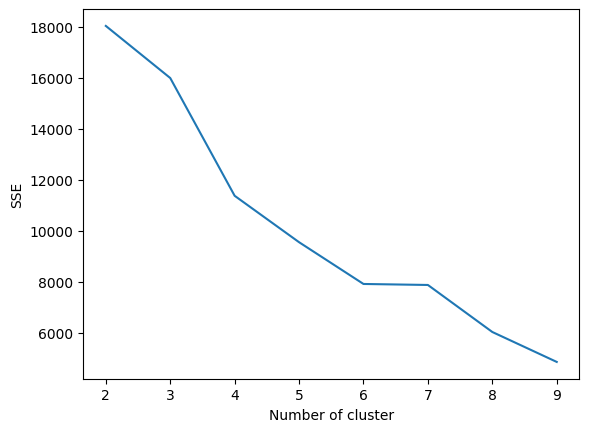

In [ ]:
# Code from (https://github.com/dbabichenko/python_for_data_and_analytics/blob/master/Clustering/Elbow_method.ipynb)
# Kmeans cluster = 6
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(superlist.drop(columns='phoneme'))
    superlist['km_cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Code from (https://github.com/dbabichenko/python_for_data_and_analytics/blob/master/Clustering/Elbow_method.ipynb)
kmeans = KMeans(n_clusters=6)
kmeans = kmeans.fit(superlist.drop(columns='phoneme'))
labels = kmeans.predict(superlist.drop(columns='phoneme'))

### __Data Analysis__

In [ ]:
# Creates a super matrix that contains every dataframe
dfsuper = pd.concat([dfenglish, dfspanish, dfgerman, dffrench, dfmandarin, dfjapanese])

In [ ]:
# Label encodes data in the ['ethnologue_family'] column for model
le = LabelEncoder()

col_values_unique = list(dfsuper['ethnologue_family'].unique())
le_fitted = le.fit(col_values_unique)

col_values = list(dfsuper['ethnologue_family'].values)
dfsuper['ef_le'] = le.transform(col_values)

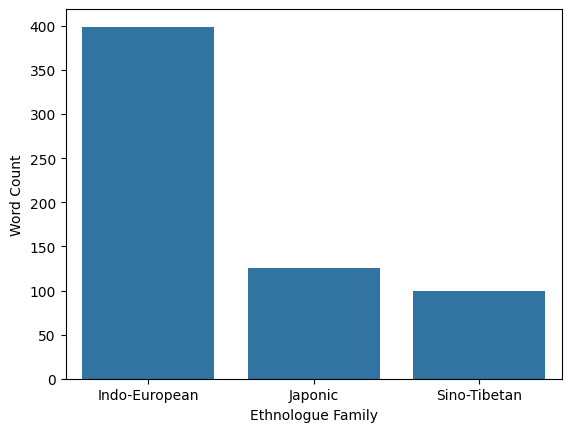

In [ ]:
# Bar graph distribution
g1 = sns.barplot(data=dfsuper['ethnologue_family'].value_counts())
g1.set(ylabel='Word Count',xlabel='Ethnologue Family')
plt.show()

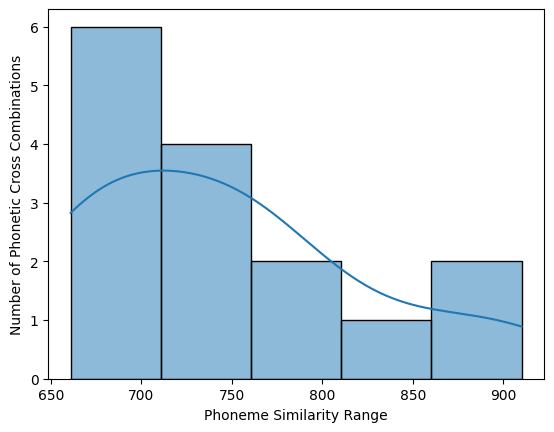

In [ ]:
# Histogram of cross combinations and phoneme count data
g2 = sns.histplot(data=crosslist, kde=True)
g2.set(ylabel='Number of Phonetic Cross Combinations',xlabel='Phoneme Similarity Range')
plt.show()

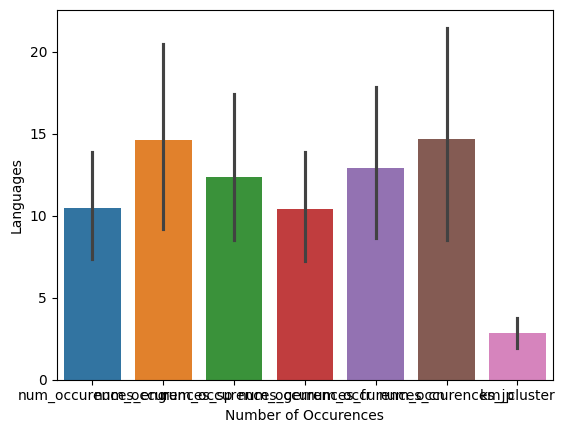

In [ ]:
g3 = sns.barplot(data=superlist)
g3.set(ylabel='Languages',xlabel='Number of Occurences')
plt.show()

### __Features__
* Features for analysis:
  1. Phonemes
       * Phonemes are sound features in languages that determine how speech is sounded so for simplicity we can think of languages having similar phonemes as having similar sounding methods.
  2. Language family
       * Language family is important to determine the origin of a language which contributes to its overall structure and ease of cross-language understanding.
  3. Similarity
       * The similarity is a number calculated from the amount of overlapping phonemes in a language.
* Statistics
  * Phonemes
    * Min: 661
    * Max: 910
    * Std: 78.036
    * Sum: 11189
    * 25%: 683
    * Mean: 745.933
    * 75%: 773.5
  * Language family
    * Min: 0
    * Max: 2
    * Std: 0.756
    * Sum: 325
    * 25%: 0
    * Mean: 0.521
    * 75%: 1
  * Similarity
    * Min: -1.127
    * Max: 2.176
    * Std: 0.999
    * Sum: 1.11e-14
    * Mean: 7.401e-16
* Predictors:
  * Phonemes and Language family
* Response:
  * Similarity
* Issues:
  * No issues